# Los Angeles Crime Analysis

## The Data


# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Which hour has the highest frequency of crimes?

In [2]:
# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


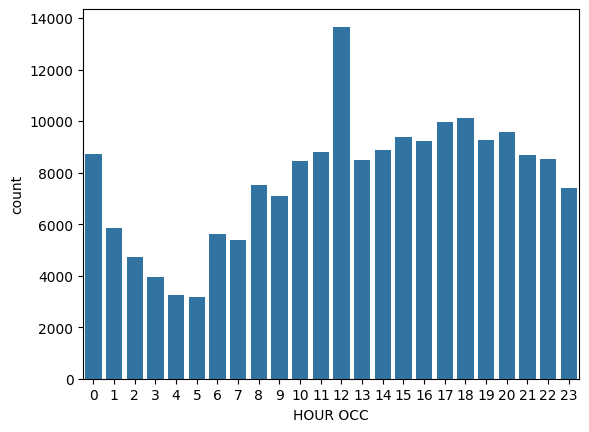

In [3]:
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

### Midday has the largest volume of crime

In [4]:
peak_crime_hour = 12

## Which area has the largest frequency of night crimes?

In [5]:
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

In [6]:
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

print(f"The area with the largest volume of night crime is: {peak_night_crime_location}")


The area with the largest volume of night crime is: Central


## Identify the number of crimes committed against victims of different age groups.

In [7]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

In [8]:
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


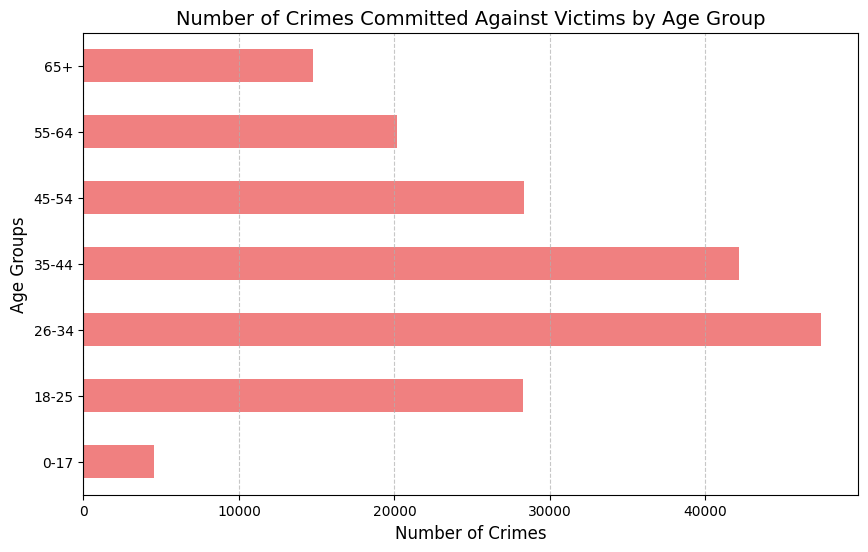

In [9]:
plt.figure(figsize=(10, 6))
sorted_victim_ages = victim_ages.sort_index()
sorted_victim_ages.plot(kind="barh", color="lightcoral")
plt.title("Number of Crimes Committed Against Victims by Age Group", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Age Groups", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


## Is there a trend in the number of crimes over the years? What are the most common months and days for crimes?

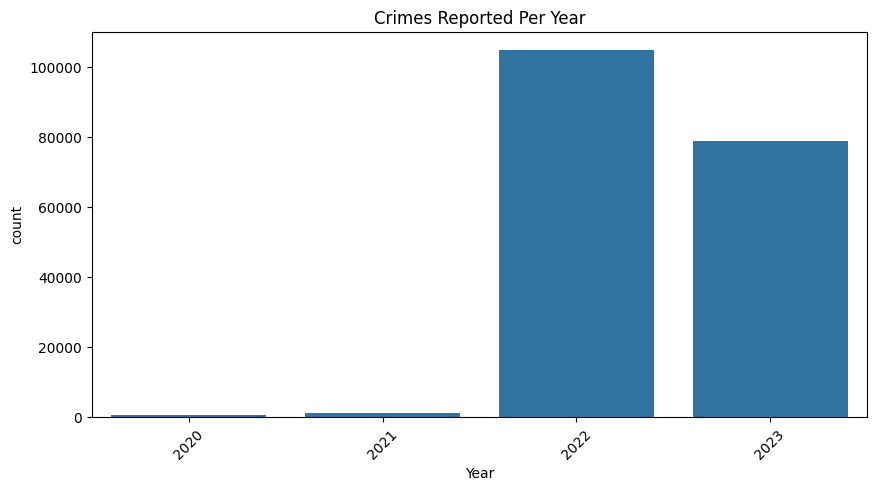

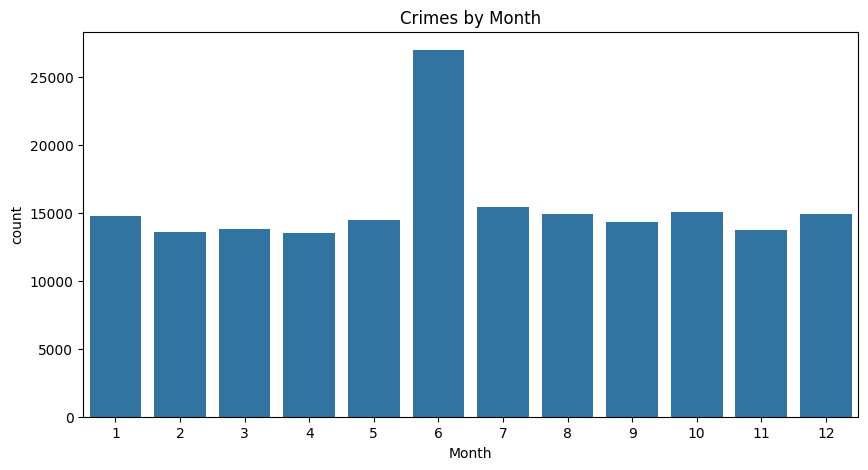

<ipython-input-15-6bf8642f1334>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


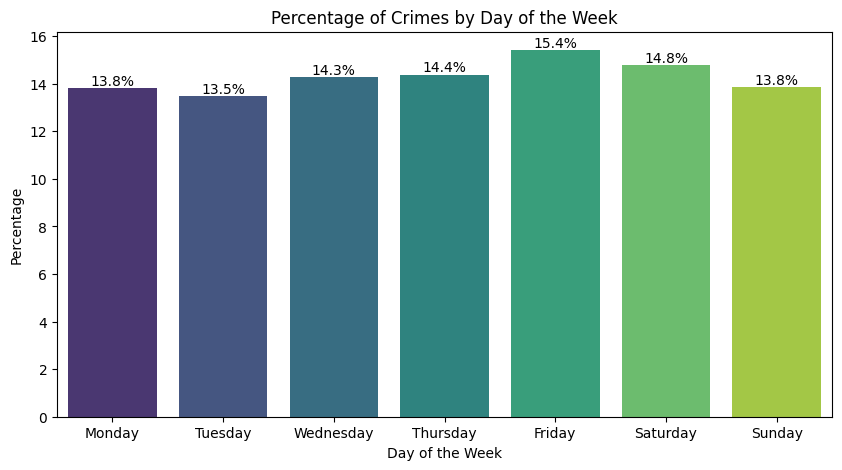

In [15]:
crimes["Year"] = crimes["DATE OCC"].dt.year
crimes["Month"] = crimes["DATE OCC"].dt.month
crimes["DayOfWeek"] = crimes["DATE OCC"].dt.day_name()

# Crimes per year
plt.figure(figsize=(10, 5))
sns.countplot(data=crimes, x="Year", order=sorted(crimes["Year"].unique()))
plt.xticks(rotation=45)
plt.title("Crimes Reported Per Year")
plt.show()

# Crimes by month
plt.figure(figsize=(10, 5))
sns.countplot(data=crimes, x="Month", order=sorted(crimes["Month"].unique()))
plt.title("Crimes by Month")
plt.show()

# Crimes by day of the week
day_counts = crimes["DayOfWeek"].value_counts(normalize=True).reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) * 100

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")

# Annotate each bar with the percentage value
for p, percentage in zip(ax.patches, day_counts.values):
    ax.annotate(f"{percentage:.1f}%",  # Format the percentage with one decimal point
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=10, color="black",
                xytext=(0, 5), textcoords="offset points")

plt.title("Percentage of Crimes by Day of the Week")
plt.ylabel("Percentage")
plt.xlabel("Day of the Week")
plt.show()





## What are the most frequently reported crime types?

Crm Cd Desc
THEFT OF IDENTITY                                           22670
BATTERY - SIMPLE ASSAULT                                    19694
BURGLARY FROM VEHICLE                                       13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              13215
INTIMATE PARTNER - SIMPLE ASSAULT                           11981
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         11484
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     10719
THEFT PLAIN - PETTY ($950 & UNDER)                          10603
BURGLARY                                                    10268
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     7057
Name: count, dtype: int64


<ipython-input-19-9d6c59243279>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="viridis")


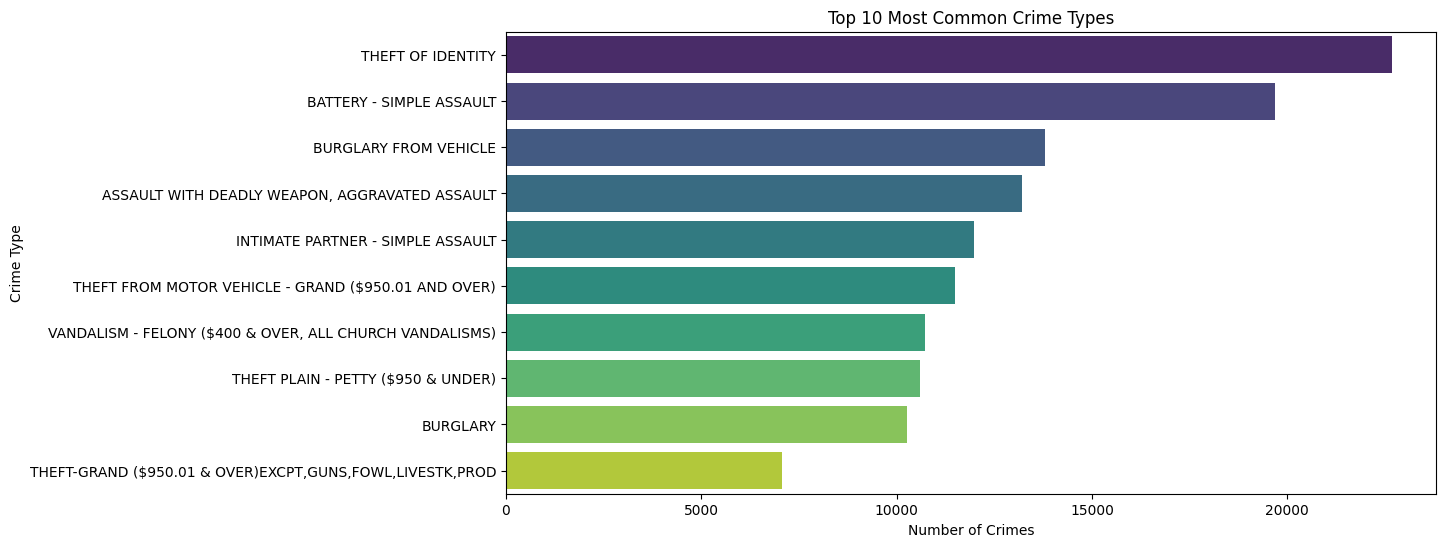

In [19]:
# Find the top 10 most common crimes along with their counts
top_crimes = crimes["Crm Cd Desc"].value_counts().nlargest(10)

# Display the result
print(top_crimes)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="viridis")
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

## What is the distribution of victim genders in the dataset, and how does the frequency of each gender compare?

Distribution of Victim Genders:
Vict Sex
M    93008
F    89854
X     2812
H       30
Name: count, dtype: int64


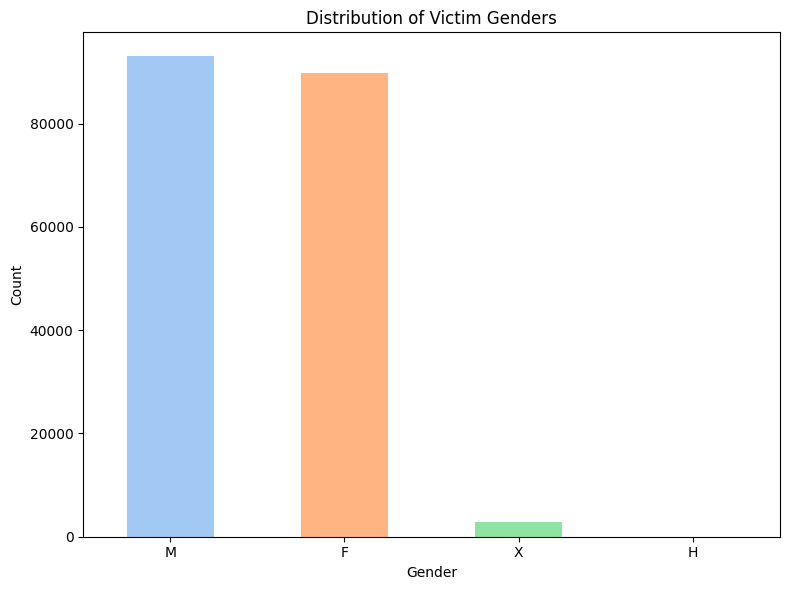

In [21]:
# Calculate the distribution of victim genders
victim_gender_counts = crimes["Vict Sex"].value_counts()

# Print the count
print("Distribution of Victim Genders:")
print(victim_gender_counts)

# Plot a bar chart
plt.figure(figsize=(8, 6))
victim_gender_counts.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title("Distribution of Victim Genders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
